# T·∫£i th∆∞ vi·ªán

In [1]:
%pip install matplotlib pandas numpy seaborn wordcloud
%pip install googletrans

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import datetime
from facebook_scraper import get_profile
from time import sleep
from ast import literal_eval
from googletrans import Translator

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
raw_df = pd.read_csv('Data/LordsMobileVN_clean.csv')


In [4]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [5]:
reactions

{'like': 54, 'love': 4, 'haha': 1, 'shares': 2, 'comments': 4}

## Ph√¢n t√≠ch Reactions

1. Ph√¢n t√≠ch s·ª± ph√°t tri·ªÉn l∆∞·ª£t react theo ng√†y

In [6]:
post_df_1=raw_df
post_df_1[['post_id', 'reactions']]

post_id                                          reactions
0    752698296898984                 {'like': 54, 'love': 4, 'haha': 1}
1    744907481011399                           {'like': 97, 'haha': 25}
2    745522664283214  {'like': 130, 'love': 3, 'haha': 30, 'wow': 1,...
3    752111686957645                 {'like': 91, 'love': 2, 'haha': 6}
4    751732603662220                            {'like': 96, 'love': 2}
..               ...                                                ...
195  688423049993176  {'like': 183, 'love': 2, 'haha': 44, 'wow': 2,...
196  686334866868661     {'like': 96, 'love': 3, 'haha': 27, 'care': 1}
197  687518510083630  {'like': 176, 'love': 3, 'haha': 164, 'wow': 2...
198  687500140085467                {'like': 132, 'love': 7, 'haha': 1}
199  683580670477414  {'like': 247, 'love': 2, 'haha': 70, 'care': 1...

[200 rows x 2 columns]

In [7]:
post_df_2=raw_df[['time' ,'reaction_count']]
post_df_2

time  reaction_count
0    2023-11-14 16:29:00              59
1    2023-11-14 08:00:00             122
2    2023-11-13 16:00:00             165
3    2023-11-13 10:23:14              99
4    2023-11-13 10:00:03              98
..                   ...             ...
195  2023-08-04 11:14:35             234
196  2023-08-04 08:00:01             127
197  2023-08-03 16:00:02             350
198  2023-08-03 08:00:01             140
199  2023-08-02 08:00:02             323

[200 rows x 2 columns]

In [8]:
post_df_2['time'] = pd.to_datetime(post_df_2['time'])
dates=post_df_2['time'].to_list()
y=post_df_2['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)

200 200
[Timestamp('2023-08-02 08:00:02'), Timestamp('2023-08-03 08:00:01'), Timestamp('2023-08-03 16:00:02'), Timestamp('2023-08-04 08:00:01'), Timestamp('2023-08-04 11:14:35'), Timestamp('2023-08-04 14:27:42'), Timestamp('2023-08-04 16:39:04'), Timestamp('2023-08-05 08:00:03'), Timestamp('2023-08-06 22:35:25'), Timestamp('2023-08-07 08:00:42'), Timestamp('2023-08-07 13:00:04'), Timestamp('2023-08-07 17:46:52'), Timestamp('2023-08-08 08:00:02'), Timestamp('2023-08-09 08:00:02'), Timestamp('2023-08-09 13:21:03'), Timestamp('2023-08-10 10:27:12'), Timestamp('2023-08-10 12:30:00'), Timestamp('2023-08-11 10:00:00'), Timestamp('2023-08-11 12:01:06'), Timestamp('2023-08-11 15:00:01'), Timestamp('2023-08-12 08:00:00'), Timestamp('2023-08-13 08:00:00'), Timestamp('2023-08-14 08:00:00'), Timestamp('2023-08-14 14:47:00'), Timestamp('2023-08-14 15:23:00'), Timestamp('2023-08-15 09:30:00'), Timestamp('2023-08-15 12:53:00'), Timestamp('2023-08-16 10:02:00'), Timestamp('2023-08-16 12:23:00'), Times

C:\Users\nhuyh\AppData\Local\Temp\ipykernel_15688\2221346998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df_2['time'] = pd.to_datetime(post_df_2['time'])


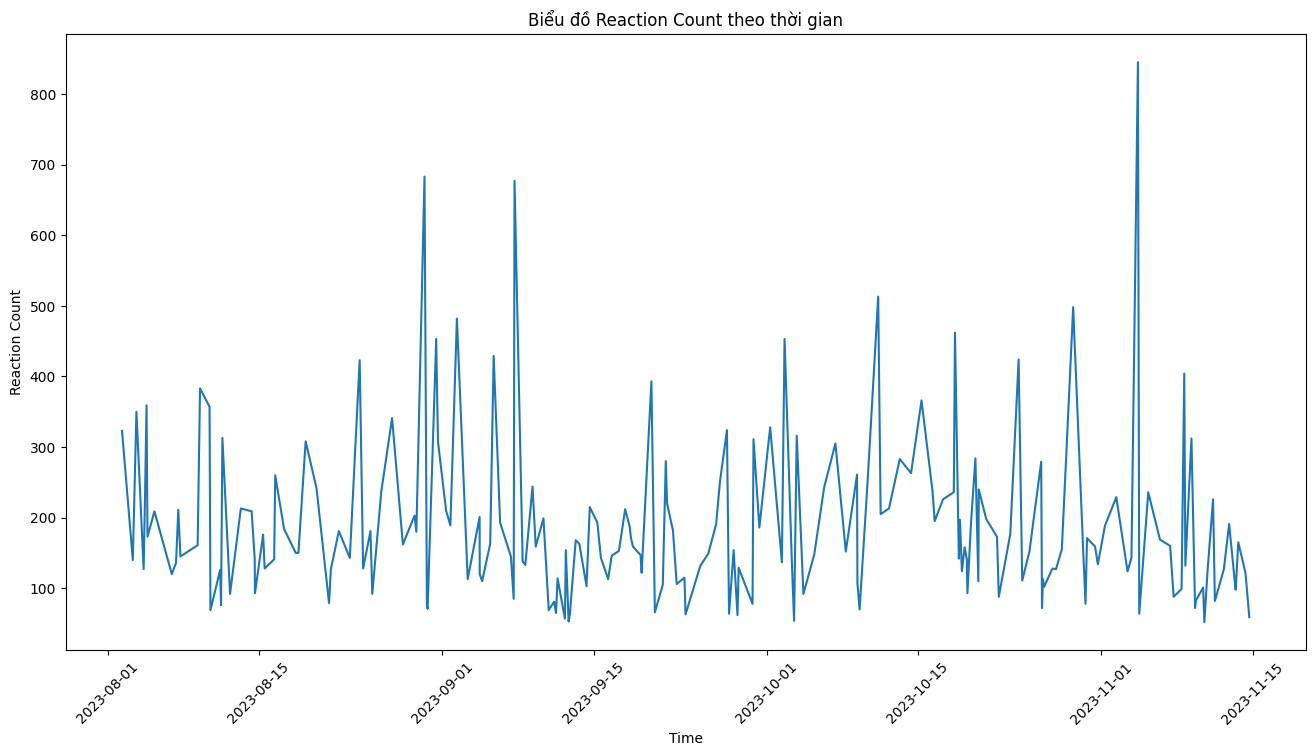

In [9]:
# bi·ªÉu ƒë·ªì th·ªÉ hi·ªán hi·ªáu xu·∫•t reaction cout c·ªßa c√°c b√†i ƒëƒÉng theo th·ªùi gian
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Reaction Count')
plt.title('Bi·ªÉu ƒë·ªì Reaction Count theo th·ªùi gian')
plt.plot(dates,y)
plt.show()

2. Ph√¢n t√≠ch t·ª´ng lo·∫°i l∆∞·ª£t reaction theo ng√†y

In [10]:
post_df_1['reactions'] = post_df_1['reactions'].apply(lambda x : dict(eval(x)) )
df_reactions = post_df_1['reactions'].apply(pd.Series )

C:\Users\nhuyh\AppData\Local\Temp\ipykernel_15688\4037589999.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_reactions = post_df_1['reactions'].apply(pd.Series )


In [11]:
# g·ªôp c√°c c·ªôt l·∫°i v√†o dataframe
df_reactions = df_reactions.fillna(0)
post_df_1 = post_df_1.fillna(' ')
post_df_with_reactions = pd.concat([post_df_1, df_reactions], axis=1).drop('reactions', axis=1)
post_df_with_reactions[['post_id','post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]

post_id                                          post_text  \
0    752698296898984  S·ª± h·ª£p t√°c ho√†nh tr√°ng gi·ªØa Lords Mobile x Arm...   
1    744907481011399            ü•π Kh√¥ng c√≥ so s√°nh, kh√¥ng c√≥ ƒëau th∆∞∆°ng   
2    745522664283214  H·ªìi x∆∞a th·∫•y b√¨nh th∆∞·ªùng ha, gi·ªù th√¨ qu√Ω l·∫Øm l...   
3    752111686957645                                                      
4    751732603662220  üéÅ TH·ª¨ TH√ÅCH GI·∫¢I ƒê·ªê 7 NG√ÄY 6 ƒê√äM G√âT G√î üéÅ\r\n‚ñ™...   
..               ...                                                ...   
195  688423049993176            M·ªùi c√°c n√¥ng d√¢n v∆∞·ªùn khoai tr·∫£ l·ªùi ·∫° !   
196  686334866868661  Sau bao nhi√™u nƒÉm, ng∆∞·ªùi ƒë√†n √¥ng t√¥i c·∫ßn nh·∫•t ...   
197  687518510083630  üßë‚Äç‚öïÔ∏è N√†o m√¨nh c√πng ƒë·∫øn thƒÉm b·ªánh nh√¢n t·∫°i Th√°n...   
198  687500140085467  Ch√†o th√°ng 8 c√πng nhi·ªÅu s·ª± ki·ªán h·∫•p d·∫´n di·ªÖn r...   
199  683580670477414     üòé B·∫≠n b·ªô full cham cam auto ƒë·∫πp nha c√°c Boss !   

      like  love   haha  wow  sad  angry  care  shares  comments  \
0     54.0   4.0    1.0  0.0  0.0    0.0   0.0       2         4   
1     97.0   0.0   25.0  0.0  0.0    0.0   0.0       1        17   
2    130.0   3.0   30.0  1.0  1.0    0.0   0.0       0        22   
3     91.0   2.0    6.0  0.0  0.0    0.0   0.0       0        17   
4     96.0   2.0    0.0  0.0  0.0    0.0   0.0       1       244   
..     ...   ...    ...  ...  ...    ...   ...     ...       ...   
195  183.0   2.0   44.0  2.0  2.0    1.0   0.0       0        79   
196   96.0   3.0   27.0  0.0  0.0    0.0   1.0       1        43   
197  176.0   3.0  164.0  2.0  3.0    0.0   2.0       1        57   
198  132.0   7.0    1.0  0.0  0.0    0.0   0.0       1        27   
199  247.0   2.0   70.0  0.0  2.0    1.0   1.0       1        55   

     reaction_count  
0                59  
1               122  
2               165  
3                99  
4                98  
..              ...  
195             234  
196             127  
197             350  
198             140  
199             323  

[200 rows x 12 columns]

In [56]:
sum(post_df_with_reactions['reaction_count'])

37748

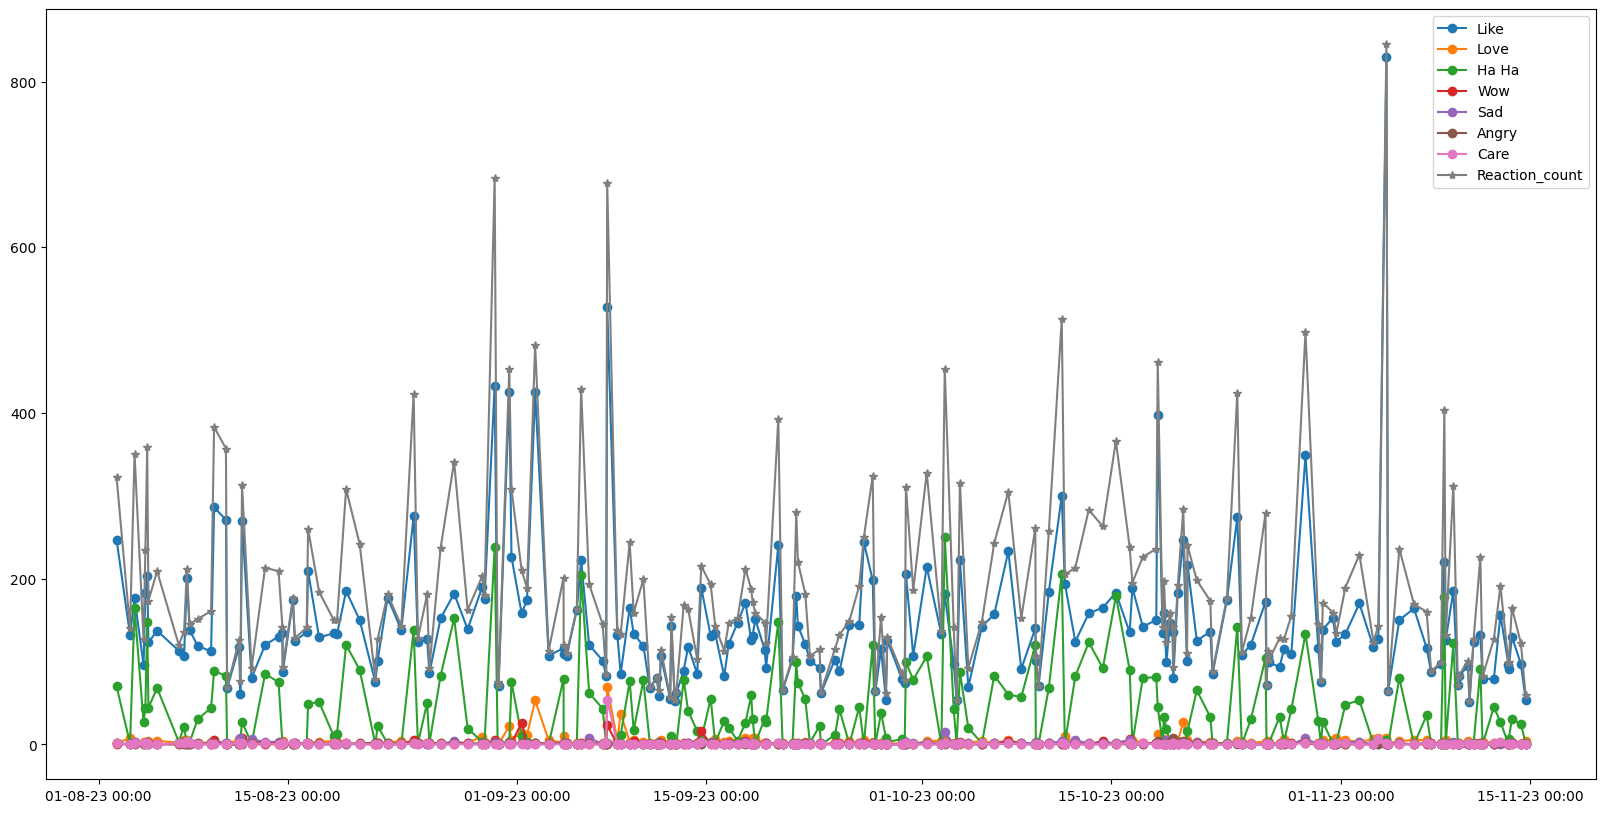

In [60]:
fig, ax = plt.subplots(figsize=(20, 10))
post_df_with_reactions['time'] = pd.to_datetime(post_df_with_reactions['time'])
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['like'], label = "Like", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['love'], label = "Love", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['sad'], label = "Sad", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['angry'], label = "Angry", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['care'], label = "Care", marker="o")
ax.plot(post_df_with_reactions['time'], post_df_with_reactions['reaction_count'], label = "Reaction_count", marker="*")

plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

3. T·ªïng t·ª´ng lo·∫°i reaction

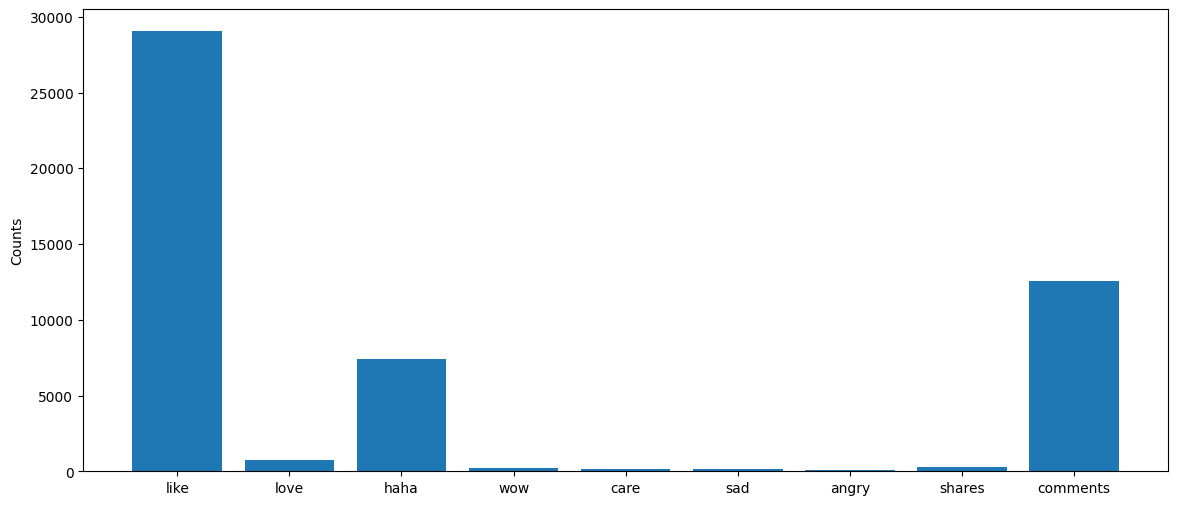

In [13]:
total_reactions = post_df_with_reactions[['like', 'love', 'haha', 'wow', 'care', 'sad', 'angry', 'shares', 'comments']].sum()
plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)

plt.ylabel('Counts')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

4. T·ªâ l·ªá c√°c lo·∫°i reaction

In [14]:
# T·ªïng c√°c c·∫£m x√∫c c√≥ s·ªë l∆∞·ª£ng √≠t
df_reactions['total residual emotions'] = df_reactions['care'] + df_reactions['sad'] + df_reactions['angry'] +df_reactions['wow']

In [15]:
total_reactions = df_reactions[['like', 'love', 'haha', 'total residual emotions']].sum()

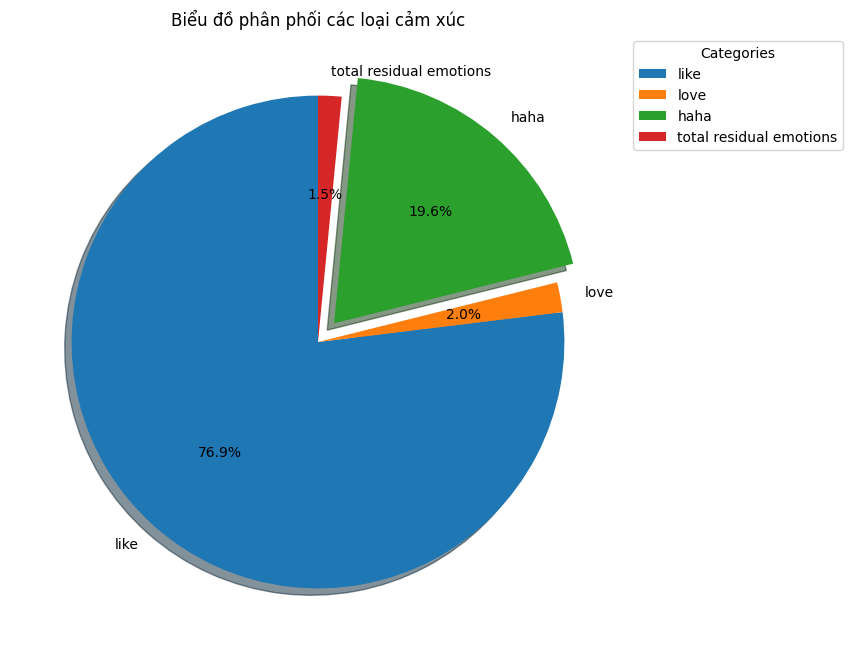

In [73]:
pie=[0,0,0.1,0]
plt.figure(figsize=(8, 8))
plt.pie(total_reactions.values, labels=total_reactions.index,explode=pie, autopct='%1.1f%%', startangle=90,shadow=True)
plt.title('Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c√°c lo·∫°i c·∫£m x√∫c')
plt.legend(title="Categories", bbox_to_anchor=(1, 1))
plt.show()

5. S·ª± t∆∞∆°ng quan gi·ªØa s·ªë l∆∞·ª£ng reactions v·ªõi c√°c tr∆∞·ªùng kh√°c nh∆∞ s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n, ƒë·ªô d√†i b√†i vi·∫øt,..

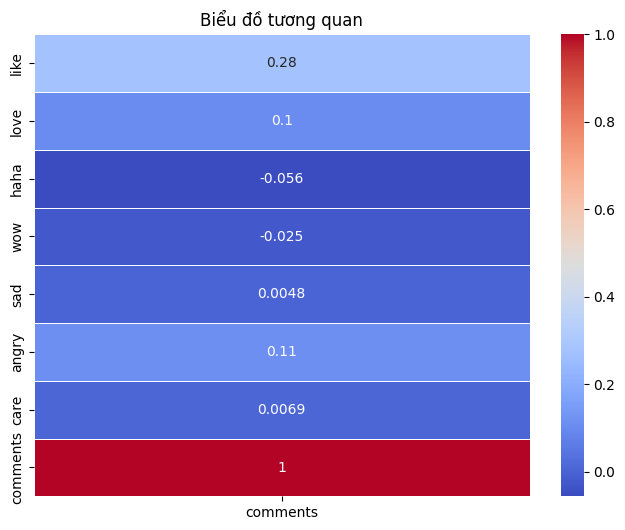

In [17]:
data_reations = post_df_with_reactions[['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'comments']]

# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
data_for_corr = data_reations.corr()

# L·∫•y ma tr·∫≠n t∆∞∆°ng quan c·ªßa 'comments' v·ªõi c√°c bi·∫øn kh√°c
correlation_with_comments = data_for_corr['comments'].to_frame()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_comments, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Bi·ªÉu ƒë·ªì t∆∞∆°ng quan")
plt.show()

# X·ª≠ l√≠ Reactors

In [18]:
def get_reactors(text):
    pattern = r"\{[^{}]*\}"
    matches = re.findall(pattern, text)
    result = [eval(match) for match in matches]
    return result

In [19]:
def createReactorsFrame(df):
    df_result = {'name' : [],
                 'link' : [],
                   'type' : [],}
    
    new_df = raw_df[~raw_df['reactors'].isna()]
    for index, rows in new_df.iterrows():
        x = rows['reactors']
        for reactor in get_reactors(x):
            try:
                df_result['name'].append(reactor['name'])
                df_result['link'].append(reactor['link'])
                df_result['type'].append(reactor['type'])
                df_result['post_id'].append(rows.post_id)
            except:
                continue
    return pd.DataFrame(df_result)

In [20]:
df_reactors = createReactorsFrame(raw_df)
df_reactors

name                                               link  \
0              Th√†nh ƒê·∫°t  https://facebook.com/profile.php?id=1000953464...   
1               S√°ng Pvs  https://facebook.com/profile.php?id=1000952600...   
2              Tatt Thgg  https://facebook.com/profile.php?id=1000940027...   
3             Huynh Ng·ªçc  https://facebook.com/profile.php?id=1000900083...   
4           Nguy·ªÖn Ph∆∞·ªõc  https://facebook.com/profile.php?id=1000897938...   
...                  ...                                                ...   
10013  Nguy·ªÖn Thi√™n Ph√∫c  https://facebook.com/profile.php?id=1000734772...   
10014          Tr·∫ßn ƒêƒÉng  https://facebook.com/profile.php?id=1000734275...   
10015         Ng·ªçc Gemma  https://facebook.com/profile.php?id=1000930930...   
10016       Vishal Singh  https://facebook.com/profile.php?id=1000919021...   
10017         Ng·ªçc Ho√†ng  https://facebook.com/profile.php?id=1000853219...   

       type  
0      like  
1      like  
2      like  
3      like  
4      like  
...     ...  
10013  haha  
10014  like  
10015  like  
10016  like  
10017  like  

[10018 rows x 3 columns]

In [21]:
# T·∫°o m·ªôt list_link r·ªóng
list_link = []

# Th√™m danh s√°ch v√†o list_link
list_link.extend(df_reactors['link'])

# In danh s√°ch
print(list_link)


['https://facebook.com/profile.php?id=100095346420738&eav=AfYxUHu5ZORKc5z2wWRHMTyhUlLw0JKZBA2yMui2zlKP7AHnSWru14G7cdfo6s0kv_4&fref=pb&paipv=0', 'https://facebook.com/profile.php?id=100095260084244&eav=AfZKN50pDUr5SKVmPx-Wfs5EAo1AMcIsFjRFCFIezgJGTgMzXv1D1C2I28JCD1-xbrA&fref=pb&paipv=0', 'https://facebook.com/profile.php?id=100094002746839&eav=AfYX7z8NlBN_FuvySTvtXctzXtfq_oSV4gJlUjASFNoLC1xmAPSvcGRe383kpwplMCc&fref=pb&paipv=0', 'https://facebook.com/profile.php?id=100090008395420&eav=AfZuGaMEq9J01wyl9Na57DawL4stIdZQ7nl1GS4yNoJNKYDpFu66zU8X1eFE9vipLcc&fref=pb&paipv=0', 'https://facebook.com/profile.php?id=100089793861463&eav=AfaQWV3sB2X2cVevAw5tEa86RDH2zIHxZd4XGHJxeCHP-PfznxPmvqtCD1aVH2Y8u-I&fref=pb&paipv=0', 'https://facebook.com/profile.php?id=100088379217721&eav=AfYhwnnntoFVS_rdHK7fVjWh2O6k5cDtywYS1yI6H3ira3064J0ZkTVM_Yq-JFl5Puo&fref=pb&paipv=0', 'https://facebook.com/amater.org?eav=AfY8P74VhWBCN-IT38MQrCUnSgQVatyCFEQfrI1tZ2avnrgRrgL5NQGYNFGGDh0ZSAo&fref=pb&paipv=0', 'https://facebook.

In [22]:
list_link = [link[link.rfind('/') + 1:] for link in list_link]

In [23]:
reactors = []
for link in list_link:
    try:
        user = get_profile(link)
        reactors.append(user)
        print(f"{len(reactors)} {user}")
    except:
        continue

1 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Kh√¥ng t√¨m th·∫•y n·ªôi dung'}
2 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Kh√¥ng t√¨m th·∫•y n·ªôi dung'}
3 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Kh√¥ng t√¨m th·∫•y n·ªôi dung'}
4 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Kh√¥ng t√¨m th·∫•y n·ªôi dung'}
5 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Kh√¥ng t√¨m th·∫•y n·ªôi dung'}
6 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Kh√¥ng t√¨m th·∫•y n·ªôi dung'}
7 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Kh√¥ng t√¨m th·∫•y n·ªôi dung'}
8 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name': 'Kh√¥ng t√¨m th·∫•y n·ªôi dung'}
9 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'Name'

C:\Users\nhuyh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\facebook_scraper\facebook_scraper.py:855: UserWarning: Facebook language detected as vi_VN - for best results, set to en_US
  warnings.warn(


754 {'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo': 'https://scontent.fhan5-8.fna.fbcdn.net/v/t39.30808-6/405249372_761430416025772_3840604300435494569_n.png?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=110&ccb=1-7&_nc_sid=ff2d77&_nc_ohc=R2bhAxjrmH0AX9mpdbX&_nc_ht=scontent.fhan5-8.fna&oh=00_AfCiD4LMy_RI_fFE5E8Sg38U7tzy0DHlBP2IktlSroFemA&oe=6572322D', 'profile_picture': 'https://scontent.fhan15-2.fna.fbcdn.net/v/t39.30808-1/406234928_762403185928495_7885415226063953522_n.jpg?stp=c86.86.340.340a_cp0_dst-jpg_e15_q65_s120x120&_nc_cat=104&ccb=1-7&_nc_sid=4da83f&_nc_ohc=X_2n88H9ookAX8faH4n&_nc_ht=scontent.fhan15-2.fna&oh=00_AfDRiAdaIL3B7wTX47ikEUVnBobhaYYi69UkQchIQbSQIQ&oe=65734A4B', 'id': '100064764606324', 'Name': 'Lords Mobile', 'Gi·ªõi thi·ªáu v·ªÅ Lords Mobile': 'H√£y s·∫µn s√†ng ƒë·ªÉ b∆∞·ªõc v√†o th·∫ø gi·ªõi h·ªón lo·∫°n c·ªßa LordsMobile - game chi·∫øn thu·∫≠t chi·∫øn ƒë·∫•u th·ªùi gian th·ª±c h√†ng ƒë·∫ßu v·ªõi ƒë·ªì h·ªça 3D ƒë·ªânh cao c·ªßa IGG!'}
75

In [24]:
df_reactors = pd.DataFrame(reactors)

In [25]:
# x√≥a null
df_reactors = df_reactors.drop(['Friend_count', 'Follower_count', 'Following_count'], axis=1)

In [26]:
# Loop through all columns
for col in df_reactors.columns:
    # Check if the column name starts with 'Gi·ªõi thi·ªáu'
    if col.startswith('Gi·ªõi thi·ªáu'):
        mask = df_reactors[col].notna()
        intro = df_reactors.loc[mask, col].values[0]
        df_reactors.loc[mask, 'Introduction'] = intro
        # Break out of the loop since we only need to do this once
        print('Found ' + col)
        print(intro)
        print()
        df_reactors.drop(col, axis=1, inplace=True)

Found Gi·ªõi thi·ªáu v·ªÅ Lords Mobile
H√£y s·∫µn s√†ng ƒë·ªÉ b∆∞·ªõc v√†o th·∫ø gi·ªõi h·ªón lo·∫°n c·ªßa LordsMobile - game chi·∫øn thu·∫≠t chi·∫øn ƒë·∫•u th·ªùi gian th·ª±c h√†ng ƒë·∫ßu v·ªõi ƒë·ªì h·ªça 3D ƒë·ªânh cao c·ªßa IGG!

Found Gi·ªõi thi·ªáu v·ªÅ Trung
Gi·ªù m·ªõi th·∫•y m√¨nh simp ƒë·∫øn m·ª©c n√†o uwu

Found Gi·ªõi thi·ªáu v·ªÅ Th√°i Nh√≠
Th√°i ƒêi·ªÅn Kh√¥i

Found Gi·ªõi thi·ªáu v·ªÅ Nguy·ªÖn
- Hay h√°t, hay c∆∞·ªùi
- Kh√¥ng th·ªÉ gi·∫≠n ai qu√° 1h
- L√† m·ªôt ng∆∞·ªùi vui v·∫ª, h√≤a ƒë·ªìng, h·∫øt m√¨nh v√¨ gia ƒë√¨nh v√† b·∫°n b√®



C:\Users\nhuyh\AppData\Local\Temp\ipykernel_15688\4093488894.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'H√£y s·∫µn s√†ng ƒë·ªÉ b∆∞·ªõc v√†o th·∫ø gi·ªõi h·ªón lo·∫°n c·ªßa LordsMobile - game chi·∫øn thu·∫≠t chi·∫øn ƒë·∫•u th·ªùi gian th·ª±c h√†ng ƒë·∫ßu v·ªõi ƒë·ªì h·ªça 3D ƒë·ªânh cao c·ªßa IGG!' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_reactors.loc[mask, 'Introduction'] = intro


In [61]:
# L·ªçc d·ªØ li·ªáu n∆°i s·ªëng
df_reactors.loc[df_reactors['N∆°i t·ª´ng s·ªëng'].notna(),['Name','N∆°i t·ª´ng s·ªëng']].head(5)

Name                                      N∆°i t·ª´ng s·ªëng
0    L√™ Vi·ªát Ho√†ng  Phu Tho, Ph√∫ Th·ªç, Vietnam\nT·ªânh/Th√†nh ph·ªë hi·ªán...
1     L·ª•c Minh H·∫£i  Tuy√™n Quang\nT·ªânh/Th√†nh ph·ªë hi·ªán t·∫°i\nS∆°n D∆∞∆°n...
2            An An  An Kh√™, Gia Lai, Vietnam\nT·ªânh/Th√†nh ph·ªë hi·ªán ...
3         L√™ D∆∞∆°ng  Th√†nh ph·ªë H·ªì Ch√≠ Minh\nT·ªânh/Th√†nh ph·ªë hi·ªán t·∫°i...
6  Thanh Nh√¢n Tran  T·ªãnh Bi√™n\nT·ªânh/Th√†nh ph·ªë hi·ªán t·∫°i\nT·ªãnh Bi√™n\...

In [62]:
# L·ªçc d·ªØ li·ªáu h·ªçc v·∫•n
df_reactors.loc[df_reactors['H·ªçc v·∫•n'].notna(), ['Name', 'H·ªçc v·∫•n']].head(5)

Name                                            H·ªçc v·∫•n
0  L√™ Vi·ªát Ho√†ng        THPT H·∫° H√≤a Confessions 3\nTr∆∞·ªùng trung h·ªçc
1   L·ª•c Minh H·∫£i  ƒê·∫°i H·ªçc Bu√¥n Ba\nCao ƒë·∫≥ng/ƒê·∫°i h·ªçc\nTr∆∞·ªùng THPT...
2          An An  Tr∆∞·ªùng THPT Quang Trung An Kh√™, Gia Lai\nTr∆∞·ªùn...
3       L√™ D∆∞∆°ng  Tr∆∞·ªùng ƒê·∫°i h·ªçc Lu·∫≠t Tp. H·ªì Ch√≠ Minh\nLu·∫≠t kinh...
4  L√™ H·ªìng Ph∆∞·ªõc  ƒê·∫°i h·ªçc FPT H√† N·ªôi\nSoftware Engineering and B...

# L·∫•y d·ªØ li·ªáu v·ªÅ ƒë·ªãa ch·ªâ , qu·ªëc gia c·ªßa ng∆∞·ªùi d√πng

In [29]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Reactions")

def country(place):
    '''
    Get country of location
    '''
    sleep(2)
    # Handle some special case
    if "Huy·ªán" in place:
        return country(place.split('Huy·ªán')[1])
    if ',' in place:
        return country(place.split(', ')[-1])
    
    try:
        location = geolocator.geocode(place, language='en')
        return location.address.split(',')[-1]
    except:
        try:
            translator = Translator()
            location = geolocator.geocode(translator.translate(place, dest='en').text, language='en')
            return country(place)
        except:
            print("Error at", place)
        return 1

print(country("H√† N·ªôi"))

 Vietnam


In [30]:
def extract_location(place):
    """Extract location from data string"""

    if place:
        place_str = str(place)
        location = place_str.split('\n')
        if len(location) < 3:
            return location[0], None
        else:
            return location[0], location[2]

    return None, None

In [31]:
df_reactors['location'] = df_reactors['N∆°i t·ª´ng s·ªëng'].apply(lambda x: extract_location(x)[0] if x else None)

In [32]:
df_reactors['country'] = df_reactors['location'].apply(lambda x: country(x) if x else None)

Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan
Error at nan


In [46]:
df_reactors.to_excel('Data/Reactors.xlsx', index=False)

In [52]:
df_reactors = pd.read_excel('Data/Reactors.xlsx')

<function matplotlib.pyplot.show(close=None, block=None)>

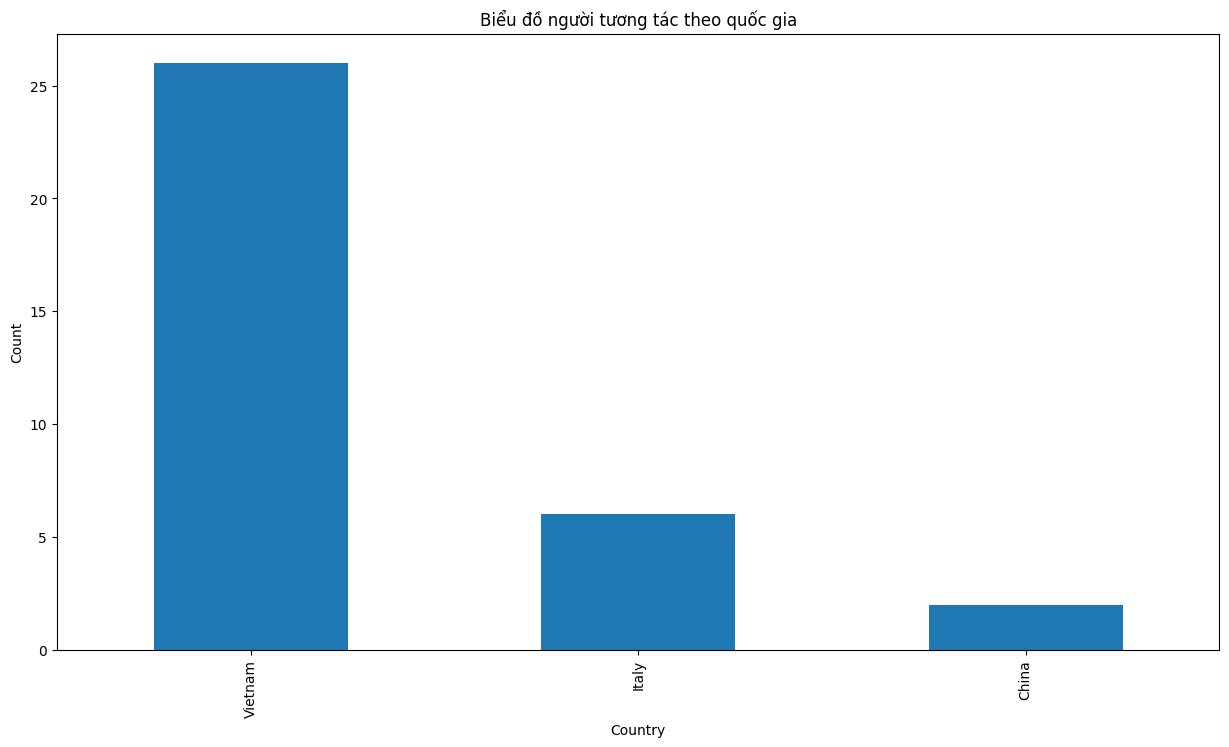

In [54]:
df_reactors['country'].value_counts().plot(kind='bar', figsize=(15,8))
plt.title('Bi·ªÉu ƒë·ªì ng∆∞·ªùi t∆∞∆°ng t√°c theo qu·ªëc gia')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show

Kh·∫£o s√°t h·ªçc v·∫•n ng∆∞·ªùi d√πng

In [63]:
def classify_education(education):
  if isinstance(education, str):  
    if 'THPT' in education:
        return 'THPT'
    elif 'ƒê·∫°i h·ªçc' in education:
        return 'ƒê·∫°i h·ªçc'
    elif 'THCS' in education or 'Trung h·ªçc c∆° s·ªü' in education:
        return 'THCS'
    elif 'Cao ƒë·∫≥ng' in education:
        return 'Cao ƒë·∫≥ng'
    elif 'University' in education:
        return 'ƒê·∫°i h·ªçc'
    else:
        return 'Kh√°c'  

df_reactors['Gi√°o D·ª•c'] = df_reactors['H·ªçc v·∫•n'].apply(classify_education)
df_reactors.dropna(subset=['Gi√°o D·ª•c'], inplace=True)
df_reactors['Gi√°o D·ª•c'].head(5)

0       THPT
1       THPT
2       THPT
3    ƒê·∫°i h·ªçc
4       THPT
Name: Gi√°o D·ª•c, dtype: object

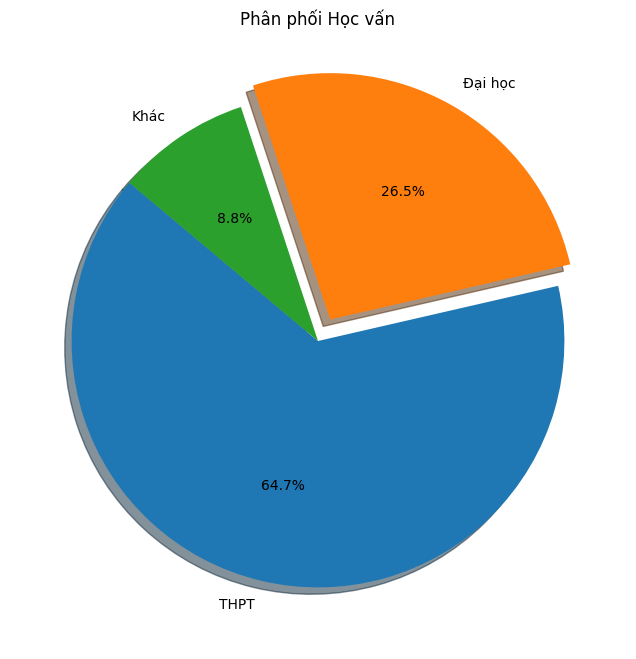

In [68]:
education_counts = df_reactors['Gi√°o D·ª•c'].value_counts()
pie =[0,0.1,0]
# Bi·ªÉu ƒë·ªì tr√≤n
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index,explode=pie, autopct='%1.1f%%', startangle=140,shadow=True)
plt.title('Ph√¢n ph·ªëi H·ªçc v·∫•n')
plt.show()